In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dosya_yolu = "/workspaces/HR_Analysis_Project/hr_dataset.csv"
df = pd.read_csv(dosya_yolu)
df.head()


,Employee_ID,Name,Age,Gender,Department,Position,Years_at_Company,Salary,Education_Level,Performance_Score,...,Remote_Work,Sick_Days_in_Last_Year,Promotion_Last_5_Years,Left_Company,Work_Life_Balance_Score,Job_Satisfaction_Score,Previous_Employer_Count,Favorite_Color,Hobby,Estimated_Annual_Bonus
0,1,Hüseyin,57.0,Male,Sales,Senior,38,NaN,Master,3,...,True,0,True,False,2,4,9,Green,Gaming,NaN
1,2,Fatma,NaN,Male,Marketing,Manager,8,54234.0,PhD,3,...,False,10,True,True,5,7,0,Yellow,Traveling,5193.274541
2,3,Ali,49.0,Male,Marketing,Intern,17,NaN,Bachelor,4,...,False,8,True,True,6,8,5,White,Music,NaN
3,4,Hüseyin,36.0,Male,IT,Junior,35,126284.0,PhD,3,...,True,6,True,True,3,9,3,Black,Sports,9139.923382
4,5,Mehmet,23.0,Male,Finance,Senior,39,52322.0,Master,1,...,False,13,False,False,2,5,7,Red,Traveling,2963.943736


# Veri Setini Keşif Edelim

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Employee_ID              10000 non-null  int64  
 1   Name                     10000 non-null  object 
 2   Age                      9500 non-null   float64
 3   Gender                   10000 non-null  object 
 4   Department               9700 non-null   object 
 5   Position                 10000 non-null  object 
 6   Years_at_Company         10000 non-null  int64  
 7   Salary                   9000 non-null   float64
 8   Education_Level          10000 non-null  object 
 9   Performance_Score        10000 non-null  int64  
 10  Marital_Status           10000 non-null  object 
 11  Has_Children             10000 non-null  bool   
 12  Working_Hours_per_Week   10000 non-null  int64  
 13  Remote_Work              10000 non-null  bool   
 14  Sick_Days_in_Last_Year 

# Açıklayıcı İstatiksel Bilgilere Bakalım

Açıklayıcı istatiksel bilgiler numeric ve object tipteki datalarda farklı bilgiler verir. Bunun için veri setimdeki sütunları numeric ve object olarak ayırmam gerekiyor. Ondan sonra ayrı ayrı istatiksel bilgileri bakacağız.

In [4]:
df.columns

Index(['Employee_ID', 'Name', 'Age', 'Gender', 'Department', 'Position',
       'Years_at_Company', 'Salary', 'Education_Level', 'Performance_Score',
       'Marital_Status', 'Has_Children', 'Working_Hours_per_Week',
       'Remote_Work', 'Sick_Days_in_Last_Year', 'Promotion_Last_5_Years',
       'Left_Company', 'Work_Life_Balance_Score', 'Job_Satisfaction_Score',
       'Previous_Employer_Count', 'Favorite_Color', 'Hobby',
       'Estimated_Annual_Bonus'],
      dtype='object')

In [5]:
df['Name'].dtype

dtype('O')

In [6]:
numeric_sütunlar = [
    sütun
    for sütun in df.columns
    if df[sütun].dtype in ["int64","float64"]
]
df[numeric_sütunlar]

,Employee_ID,Age,Years_at_Company,Salary,Performance_Score,Working_Hours_per_Week,Sick_Days_in_Last_Year,Work_Life_Balance_Score,Job_Satisfaction_Score,Previous_Employer_Count,Estimated_Annual_Bonus
0,1,57.0,38,NaN,3,31,0,2,4,9,NaN
1,2,NaN,8,54234.0,3,45,10,5,7,0,5193.274541
2,3,49.0,17,NaN,4,47,8,6,8,5,NaN
3,4,36.0,35,126284.0,3,47,6,3,9,3,9139.923382
4,5,23.0,39,52322.0,1,42,13,2,5,7,2963.943736
...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,63.0,8,123268.0,3,53,6,1,3,8,17189.899795
9996,9997,41.0,4,110551.0,3,53,2,4,4,7,9860.980842
9997,9998,46.0,3,118467.0,1,59,4,2,3,6,11478.411883
9998,9999,21.0,8,121164.0,1,57,2,9,9,1,6298.654648


In [7]:
object_sütunlar = [
    sütun
    for sütun in df.columns
    if df[sütun].dtype == "O"
]
df[object_sütunlar]

,Name,Gender,Department,Position,Education_Level,Marital_Status,Favorite_Color,Hobby
0,Hüseyin,Male,Sales,Senior,Master,Divorced,Green,Gaming
1,Fatma,Male,Marketing,Manager,PhD,Single,Yellow,Traveling
2,Ali,Male,Marketing,Intern,Bachelor,Single,White,Music
3,Hüseyin,Male,IT,Junior,PhD,Married,Black,Sports
4,Mehmet,Male,Finance,Senior,Master,Married,Red,Traveling
...,...,...,...,...,...,...,...,...
9995,Fatma,Female,Finance,Senior,High School,Married,White,Sports
9996,Mehmet,Female,Operations,Junior,PhD,Married,Green,Gaming
9997,Emine,Female,Operations,Intern,Master,Single,Red,Reading
9998,Emine,Female,HR,Senior,Master,Single,Green,Music


In [8]:
df[numeric_sütunlar].describe().T

,count,mean,std,min,25%,50%,75%,max
Employee_ID,10000.0,5000.500000,2886.895680,1.000000,2500.750000,5000.500000,7500.250000,10000.000000
Age,9500.0,40.862737,13.433499,18.000000,30.000000,41.000000,53.000000,64.000000
Years_at_Company,10000.0,19.502500,11.588478,0.000000,9.000000,20.000000,29.000000,39.000000
Salary,9000.0,89832.444778,34580.446485,30002.000000,59597.000000,89414.500000,119852.000000,149952.000000
Performance_Score,10000.0,2.508400,1.126080,1.000000,1.000000,2.500000,4.000000,4.000000
Working_Hours_per_Week,10000.0,39.669800,11.617360,20.000000,30.000000,40.000000,50.000000,59.000000
Sick_Days_in_Last_Year,10000.0,7.074900,4.313554,0.000000,3.000000,7.000000,11.000000,14.000000
Work_Life_Balance_Score,10000.0,4.987400,2.587800,1.000000,3.000000,5.000000,7.000000,9.000000
Job_Satisfaction_Score,10000.0,4.983400,2.587275,1.000000,3.000000,5.000000,7.000000,9.000000
Previous_Employer_Count,10000.0,4.471400,2.887424,0.000000,2.000000,4.000000,7.000000,9.000000


In [9]:
df[object_sütunlar].describe().T

,count,unique,top,freq
Name,10000,8,Ali,1271
Gender,10000,2,Female,5032
Department,9700,6,Sales,1737
Position,10000,5,Senior,2020
Education_Level,10000,4,Bachelor,2535
Marital_Status,10000,3,Married,3354
Favorite_Color,10000,6,White,1701
Hobby,10000,5,Traveling,2121


# Eksik Veriler İle Uğraşalım

In [10]:
# Eksik veri Sayısına bakalım
df.isnull().sum()

Employee_ID                   0
Name                          0
Age                         500
Gender                        0
Department                  300
Position                      0
Years_at_Company              0
Salary                     1000
Education_Level               0
Performance_Score             0
Marital_Status                0
Has_Children                  0
Working_Hours_per_Week        0
Remote_Work                   0
Sick_Days_in_Last_Year        0
Promotion_Last_5_Years        0
Left_Company                  0
Work_Life_Balance_Score       0
Job_Satisfaction_Score        0
Previous_Employer_Count       0
Favorite_Color                0
Hobby                         0
Estimated_Annual_Bonus     1000
dtype: int64

In [11]:
eksik_veri_orani = pd.isnull(df).mean() # Her sütunun eksik veri oranını aldık yüzdesel olarak
eksik_veri_orani

Employee_ID                0.00
Name                       0.00
Age                        0.05
Gender                     0.00
Department                 0.03
Position                   0.00
Years_at_Company           0.00
Salary                     0.10
Education_Level            0.00
Performance_Score          0.00
Marital_Status             0.00
Has_Children               0.00
Working_Hours_per_Week     0.00
Remote_Work                0.00
Sick_Days_in_Last_Year     0.00
Promotion_Last_5_Years     0.00
Left_Company               0.00
Work_Life_Balance_Score    0.00
Job_Satisfaction_Score     0.00
Previous_Employer_Count    0.00
Favorite_Color             0.00
Hobby                      0.00
Estimated_Annual_Bonus     0.10
dtype: float64

In [12]:
# Doldurmam gereken eksik verileri aldım
dolduralacak_eksik_veriler = eksik_veri_orani[(eksik_veri_orani < 0.5) & (eksik_veri_orani > 0.00)].index
dolduralacak_eksik_veriler

Index(['Age', 'Department', 'Salary', 'Estimated_Annual_Bonus'], dtype='object')

In [13]:
#Sayısal eksik verileri dolduralım
def eksik_veri_doldurma(sütun:str):
    return df[sütun].fillna(df[sütun].mean(), inplace = True)

eksik_veri_doldurma('Age')
eksik_veri_doldurma('Salary')
eksik_veri_doldurma('Estimated_Annual_Bonus')

/tmp/ipykernel_30853/2155788233.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  return df[sütun].fillna(df[sütun].mean(), inplace = True)


In [14]:
# Object sütunun eksik verisini doldurma
df['Department'].fillna(df['Department'].mode()[0], inplace=True)

/tmp/ipykernel_30853/1042093774.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Department'].fillna(df['Department'].mode()[0], inplace=True)


In [15]:
df['Department'].mode()[0]

'Sales'

In [16]:
df.isnull().sum()

Employee_ID                0
Name                       0
Age                        0
Gender                     0
Department                 0
Position                   0
Years_at_Company           0
Salary                     0
Education_Level            0
Performance_Score          0
Marital_Status             0
Has_Children               0
Working_Hours_per_Week     0
Remote_Work                0
Sick_Days_in_Last_Year     0
Promotion_Last_5_Years     0
Left_Company               0
Work_Life_Balance_Score    0
Job_Satisfaction_Score     0
Previous_Employer_Count    0
Favorite_Color             0
Hobby                      0
Estimated_Annual_Bonus     0
dtype: int64

In [17]:
len(df.columns)

23

# Özellik Mühendisliği -- Feature Engineering

Var olan sütunların değerlerini inceleyerek yeni sütunlar üretebilmektir. Burada yeni sütun üretebilmek için aşağıdaki madeler aranır.

        * Oluşturulan yeni sütunun veri setinde ilişkili olması beklenir.

        * Oluşturulan yeni sütunun eski sütundan daha iyi analiz edilebilir bir yapıda olması beklenir.
        
        * Oluşturulan yeni sütunun eski sütundan veya sütunlardan daha zengin anlam çıkartması beklenir

Eğer sayılabilen bir sayısal verim var ise bu veriyi belli aralıklar içerisinde yeni bir sütun olarak oluşturursak daha anlamlı bir bilgi çıkarabiliriz

In [18]:
df['Age'].value_counts().sort_index()

Age
18.000000    192
19.000000    201
20.000000    195
21.000000    202
22.000000    196
23.000000    197
24.000000    191
25.000000    202
26.000000    208
27.000000    212
28.000000    171
29.000000    192
30.000000    232
31.000000    202
32.000000    226
33.000000    228
34.000000    232
35.000000    217
36.000000    205
37.000000    197
38.000000    210
39.000000    208
40.000000    216
40.862737    500
41.000000    206
42.000000    186
43.000000    219
44.000000    199
45.000000    213
46.000000    205
47.000000    193
48.000000    206
49.000000    187
50.000000    199
51.000000    185
52.000000    182
53.000000    198
54.000000    204
55.000000    200
56.000000    227
57.000000    181
58.000000    195
59.000000    211
60.000000    179
61.000000    226
62.000000    200
63.000000    177
64.000000    190
Name: count, dtype: int64

In [19]:
df['Yaş_Grupları'] = pd.cut(df['Age'],[18,25,35,45,55,65], labels = ["18-25","26-35","36-45","46-55","56-65"])
df['Yaş_Grupları'].value_counts()

Yaş_Grupları
36-45    2559
26-35    2120
46-55    1959
56-65    1786
18-25    1384
Name: count, dtype: int64

# 2.Özellik Mühendisliği

Çalışanın aylık maaşı ile şirkette kaç yıl çalıştığının oranını alırsak bu çalışan hakkında daha fazla bilgiye erişmiş oluruz.

In [20]:
df['Aideyetlik_Miktarı'] = (df['Salary'] / df['Years_at_Company'])
df['Aideyetlik_Miktarı']

0        2364.011705
1        6779.250000
2        5284.261458
3        3608.114286
4        1341.589744
            ...     
9995    15408.500000
9996    27637.750000
9997    39489.000000
9998    15145.500000
9999     1887.294118
Name: Aideyetlik_Miktarı, Length: 10000, dtype: float64

# 3. Özellik Mühendisliği

Var olan veri çeşidi içerisinden sadece ihtiyaç duyulan kısıtlı bilgiye erişim sağlanmak istenirse veri mühendisliği kullanılması gerekir.

Position sütunun içerisinden ben sadece Senior olanları almak istiyorum bunu veri mühendisliğini yapalım.

In [21]:
df['Senyör_mü'] = np.where(df['Position'].isin(['Manager','Team Lead','Senior']),1,0) # Eğer Senior sütunun içerisindeki değerlerde 'Manager','Team Lead','Senior' bunlar varsa 1 yazyoksa 0 y
df['Senyör_mü']

0       1
1       1
2       0
3       0
4       1
       ..
9995    1
9996    0
9997    0
9998    1
9999    0
Name: Senyör_mü, Length: 10000, dtype: int64

# 4. Özellik Mühendisliği

2'den çok sütunlar arasında sorular sorarak ve soruların cevapları olarak ilişki kurma yöntemine ağaçlandırma modeli denir. Bu şekilde çok kapsamlı bir mühendislikle yeni sütunlar oluşturulabilir.

In [22]:
df['Marital_Status'].unique()

array(['Divorced', 'Single', 'Married'], dtype=object)

In [23]:
df['Has_Children'].unique()

array([False,  True])

In [24]:
df['Aile_Durumu'] = np.where((df['Marital_Status'] == 'Married') & (df['Has_Children']),'Evli ve Çocuk Sahibi', 'Diğerleri')
df['Aile_Durumu'].value_counts()

Aile_Durumu
Diğerleri               8289
Evli ve Çocuk Sahibi    1711
Name: count, dtype: int64

# 5.Özellik Mühendisliği

Hastalık bahanesiyle uzaktan çalışanlara bir göz atalım. Doldandırıcılık (Freud) Analiz için kullanılabilir.

In [25]:
df['Remote_Work'] # Uzaktan çalışıyorsa True çalışmıyorsa False Bilgisini verir

0        True
1       False
2       False
3        True
4       False
        ...  
9995    False
9996     True
9997    False
9998     True
9999     True
Name: Remote_Work, Length: 10000, dtype: bool

In [26]:
df['Sick_Days_in_Last_Year']

0        0
1       10
2        8
3        6
4       13
        ..
9995     6
9996     2
9997     4
9998     2
9999     9
Name: Sick_Days_in_Last_Year, Length: 10000, dtype: int64

In [27]:
df['Working_Hours_per_Week'].describe()

count    10000.00000
mean        39.66980
std         11.61736
min         20.00000
25%         30.00000
50%         40.00000
75%         50.00000
max         59.00000
Name: Working_Hours_per_Week, dtype: float64

In [28]:
df['Working_Hours_per_Week'].describe()

count    10000.00000
mean        39.66980
std         11.61736
min         20.00000
25%         30.00000
50%         40.00000
75%         50.00000
max         59.00000
Name: Working_Hours_per_Week, dtype: float64

Uzaktan çalışanların hasta oldukları günlere oranına bakalım

In [29]:
#Eğer çalışan uzaktan çalışıyorsa uzaktan çalışma/hastalık günleri oranına bakıp çalışma verimliliği bilgisini elde ediyoruz
df['Uzaktan_Çalışanların_Hasta_Gün_Oranlari'] = np.where(df['Remote_Work'],(df['Sick_Days_in_Last_Year']/df['Working_Hours_per_Week'] + 1),0)
df[['Name','Working_Hours_per_Week','Sick_Days_in_Last_Year','Remote_Work','Uzaktan_Çalışanların_Hasta_Gün_Oranlari']].tail(20)

,Name,Working_Hours_per_Week,Sick_Days_in_Last_Year,Remote_Work,Uzaktan_Çalışanların_Hasta_Gün_Oranlari
9980,Fatma,46,8,False,0.000000
9981,Emine,55,1,False,0.000000
9982,Elif,20,6,True,1.300000
9983,Mehmet,35,5,True,1.142857
9984,Ayşe,23,7,False,0.000000
9985,Fatma,42,2,False,0.000000
9986,Ali,51,5,False,0.000000
9987,Emine,22,10,False,0.000000
9988,Emine,40,1,False,0.000000
9989,Ali,43,12,True,1.279070


1'den sonra değer ne kadar fazla yükselirse çalışanın tembel olma ihtimali ya da hasta bahanesiyle uzaktan çalışma ihtimali doğru orantılı olarak artıyor.

Az gün hasta olan 1.3 gösterdi

Çok gün hasta olan 1.5 gösterdi

10 gün hasta olan 40 saat çalışanın oranı 1.25

10 gün hasta olan 30 saat çalışan oranı 1.33

# Gruplama

Cinsiyetlere göre bir gruplama yapın ve hangi cinsiyetin uzaktan_çalışma_hasta_olma_oranları sütunun ortalamasını alarak cinsiyetin tembellik ile ilgili bir ilişki var mı yok mu yorumlayın

In [30]:
df.groupby('Gender')['Uzaktan_Çalışanların_Hasta_Gün_Oranlari'].mean().sort_values()

Gender
Male      0.597908
Female    0.604254
Name: Uzaktan_Çalışanların_Hasta_Gün_Oranlari, dtype: float64

# Korelasyon Sütunlar arasında İlişki Bakma Durumu

Korelasyon sütunların birbiri ile olan ilişklerini gösterir. Eğer Sütunlar arasında doğru orantılı bir ilişki varsa burada korelasyon katsayısı yüksektir ve sıcak renkler gözükür
Eğer Sütunlar arasında ters orantı varsa korelasyon katsayısı düşüktür ve soğuk renkler gözükür

**Korelasyon Kullanma Senaryoları**

Özellik Mühendisliğinden sonra yeni oluşturulan sütunların diğer sütunlarla ilişkisini inceleyerek özellik mühendisliğinin kalitesi ölçülür.

Verileri kapsamlı bir şekilde incelemek için bütün sütunlar arasındaki ilişkşilere bakılır.

<Axes: >

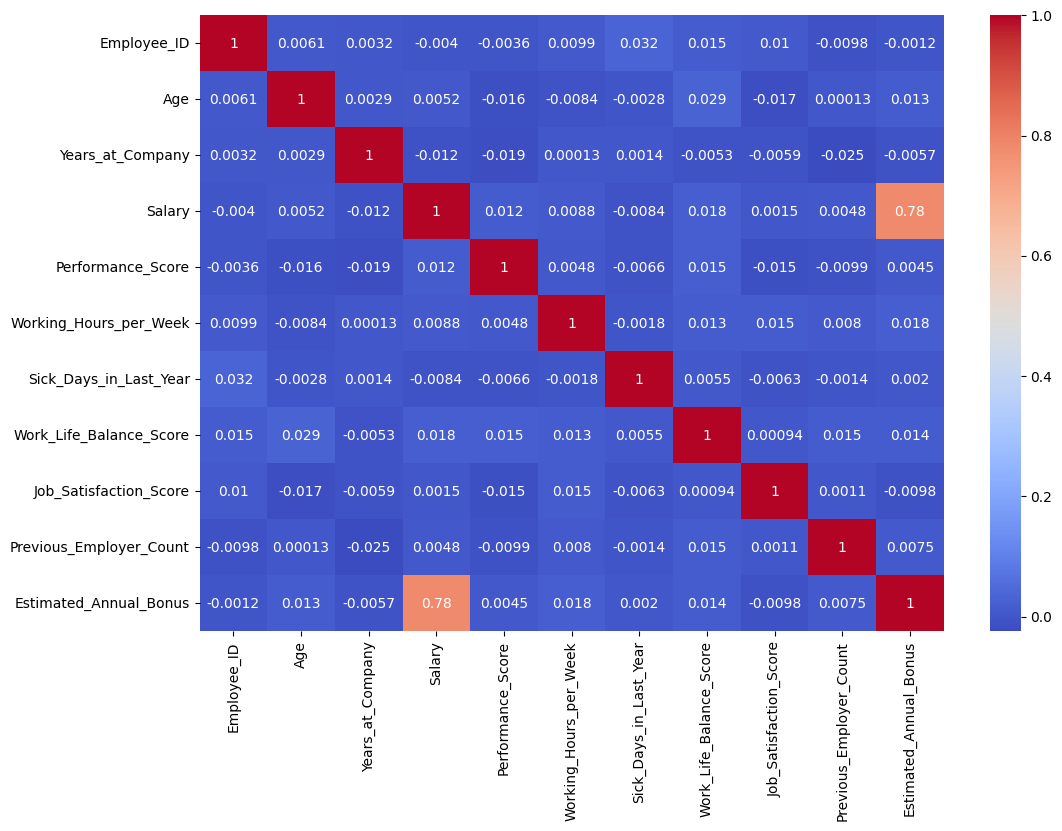

In [33]:
#Korelasyon Matrisi
plt.figure(figsize=(12,8))
sns.heatmap(df[numeric_sütunlar].corr(), annot =True, cmap = 'coolwarm')

# Yaş aralıklarını görselleştirelim

In [35]:
df.columns

Index(['Employee_ID', 'Name', 'Age', 'Gender', 'Department', 'Position',
       'Years_at_Company', 'Salary', 'Education_Level', 'Performance_Score',
       'Marital_Status', 'Has_Children', 'Working_Hours_per_Week',
       'Remote_Work', 'Sick_Days_in_Last_Year', 'Promotion_Last_5_Years',
       'Left_Company', 'Work_Life_Balance_Score', 'Job_Satisfaction_Score',
       'Previous_Employer_Count', 'Favorite_Color', 'Hobby',
       'Estimated_Annual_Bonus', 'Yaş_Grupları', 'Aideyetlik_Miktarı',
       'Senyör_mü', 'Aile_Durumu', 'Uzaktan_Çalışanların_Hasta_Gün_Oranlari'],
      dtype='object')

Text(0, 0.5, 'Frekanslar')

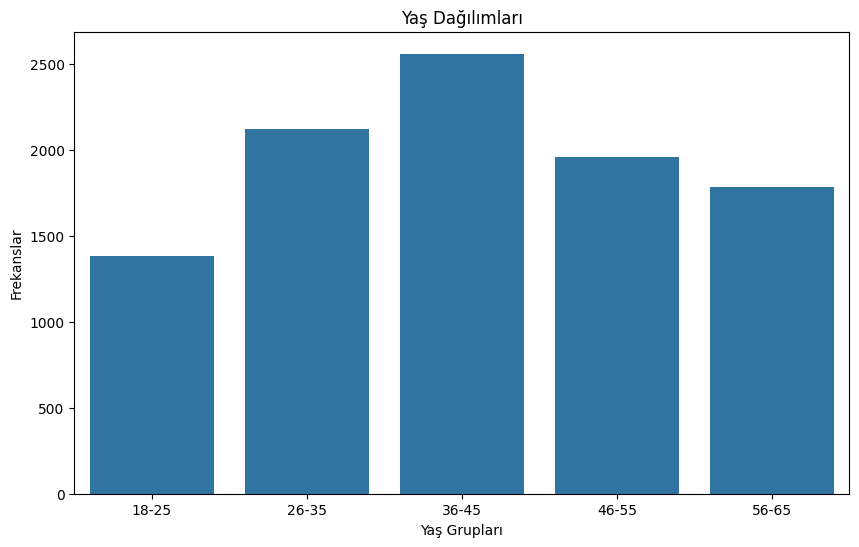

In [36]:
plt.figure(figsize=(10,6))
sns.countplot(data = df, x = 'Yaş_Grupları', order=["18-25","26-35","36-45","46-55","56-65"])
plt.title('Yaş Dağılımları')
plt.xlabel('Yaş Grupları')
plt.ylabel('Frekanslar')

Şirkete 18-25 yaş arası genç çalışanları almak şirketin vizyonu doğrultusunda doğru bir sonuç olacaktır. Bunun için şirketten 500-600 56-65 yaş arasındaki kişiyi emekli edebiliriz

# Şirket Çalışanlarının Şirkete olan bağlılık seviyesinin dağılımına bakalım

In [38]:
df['Aideyetlik_Miktarı']

0        2364.011705
1        6779.250000
2        5284.261458
3        3608.114286
4        1341.589744
            ...     
9995    15408.500000
9996    27637.750000
9997    39489.000000
9998    15145.500000
9999     1887.294118
Name: Aideyetlik_Miktarı, Length: 10000, dtype: float64

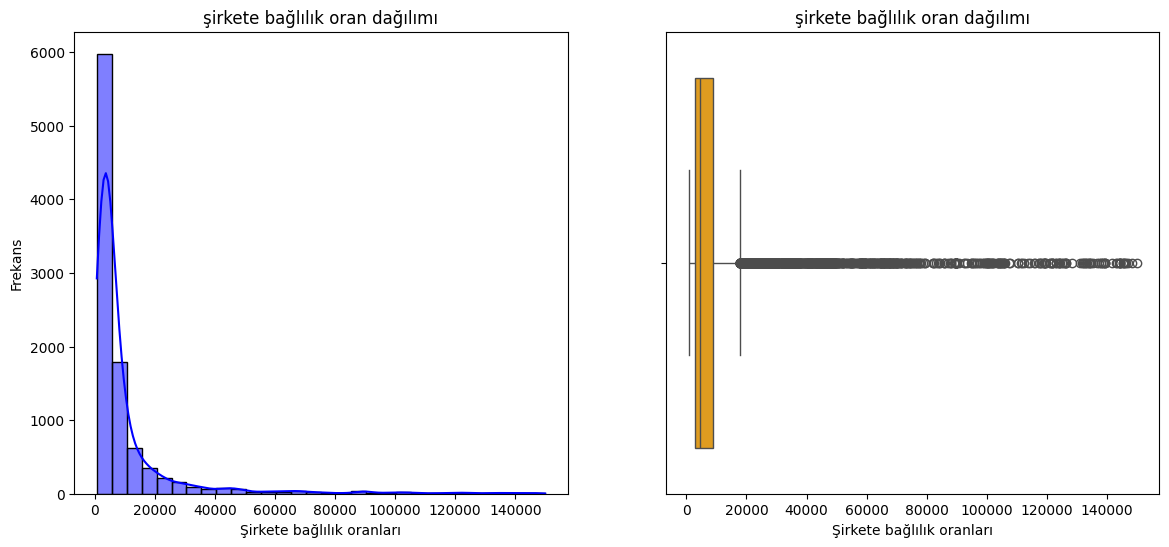

In [41]:
plt.figure(figsize=(14,6))

# 1.satırın 1. sütun grafiğini ekledik
plt.subplot(1,2,1)
sns.histplot(df['Aideyetlik_Miktarı'], kde = True, bins = 30, color = 'blue')
plt.title("şirkete bağlılık oran dağılımı")
plt.xlabel('Şirkete bağlılık oranları')
plt.ylabel('Frekans')

# 1.satırın 2.sütun grafiğini ekledik
plt.subplot(1,2,2)
sns.boxplot(x=df['Aideyetlik_Miktarı'], color = 'Orange')
plt.title('şirkete bağlılık oran dağılımı')
plt.xlabel('Şirkete bağlılık oranları')

plt.show()

kurumda kendi aideyetlik yoksunu hisseden 6000 kişi için toplantılar düzenlenip sorunlarının dinlemesini tavsiye ederiz.

50000 kazanıyorum 25 yıl boyunca çalıştım aideyetlik oranım 2000

30000 kazanıyorum 25 yıl boyunca çallıştım aideytelik oranım 1200

60000 kazanıyorum 15 yıl çalıştım aideyetlik oranım 4000

60000 kazanıyorum 5 yıl çalıştım aideyetlik oranım 12000

# Şirkette ki uzman kişilerin yüzdesini görüntüleyelim

In [42]:
df.columns

Index(['Employee_ID', 'Name', 'Age', 'Gender', 'Department', 'Position',
       'Years_at_Company', 'Salary', 'Education_Level', 'Performance_Score',
       'Marital_Status', 'Has_Children', 'Working_Hours_per_Week',
       'Remote_Work', 'Sick_Days_in_Last_Year', 'Promotion_Last_5_Years',
       'Left_Company', 'Work_Life_Balance_Score', 'Job_Satisfaction_Score',
       'Previous_Employer_Count', 'Favorite_Color', 'Hobby',
       'Estimated_Annual_Bonus', 'Yaş_Grupları', 'Aideyetlik_Miktarı',
       'Senyör_mü', 'Aile_Durumu', 'Uzaktan_Çalışanların_Hasta_Gün_Oranlari'],
      dtype='object')

In [45]:
senyör_sayıları = df['Senyör_mü'].value_counts()

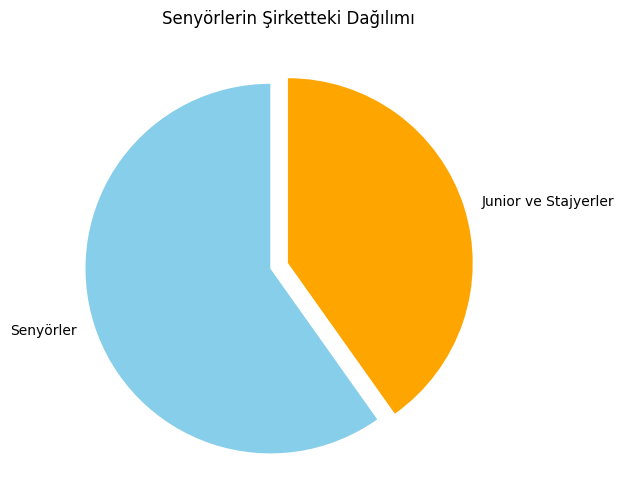

In [48]:
plt.figure(figsize=(6,6))
plt.pie(
    senyör_sayıları,
    labels = ['Senyörler','Junior ve Stajyerler'],
    colors = ['skyblue','orange'],
    startangle=90,
    explode = [0.1,0]
)
plt.title('Senyörlerin Şirketteki Dağılımı')
plt.show()

Şirkette yaşlı kişi sayısı çok olduğundan ve bu kişiler senior ve aideyeti düşük insanlar olduğundan bu kişileri %40 kadar emekli edip bunun yerine %40 junior ve stajyerlerden alıp aideyeti yüksek senior kişilerin altında yetişmeye verip yeni start uplar için bir oluşum yapmanızı tavsiye ederiz.